In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import display

# data initialization
players = pd.read_csv('data/players.csv')
matches_2021_2s = pd.read_csv('data/matches_2021_2s.csv')
matches_2022_1s = pd.read_csv('data/matches_2022_1s.csv')
matches_2022_2s = pd.read_csv('data/matches_2022_2s.csv')
# data cleaning
players.player = players.player.apply(str.strip)
players.replace(to_replace="None", value=np.nan, inplace=True)

# map seeds to matches
map_2021_2s = dict(players[players.columns[[0, 1]]].dropna().to_dict('split')['data'])
matches_2021_2s['seed1'] = matches_2021_2s.t1p1.map(map_2021_2s)
matches_2021_2s['seed2'] = matches_2021_2s.t2p1.map(map_2021_2s)

map_2022_1s = dict(players[players.columns[[0, 2]]].dropna().to_dict('split')['data'])
matches_2022_1s['seed1'] = matches_2022_1s.p1.map(map_2022_1s)
matches_2022_1s['seed2'] = matches_2022_1s.p2.map(map_2022_1s)

map_2022_2s = dict(players[players.columns[[0, 3]]].dropna().to_dict('split')['data'])
matches_2022_2s['seed1'] = matches_2022_2s.t1p1.map(map_2022_2s)
matches_2022_2s['seed2'] = matches_2022_2s.t2p1.map(map_2022_2s)

matches_1s = pd.concat([matches_2022_1s]).reset_index(drop=True)
matches_2s = pd.concat([matches_2021_2s, matches_2022_2s]).reset_index(drop=True)

matches_1s.p1 = matches_1s.p1.apply(str.strip)
matches_1s.p2 = matches_1s.p2.apply(str.strip)
matches_1s.seed1 = matches_1s.seed1.apply(int)
matches_1s.seed2 = matches_1s.seed2.apply(int)
matches_2s.t1p1 = matches_2s.t1p1.apply(str.strip)
matches_2s.t1p2 = matches_2s.t1p2.apply(str.strip)
matches_2s.t2p1 = matches_2s.t2p1.apply(str.strip)
matches_2s.t2p2 = matches_2s.t2p2.apply(str.strip)
matches_2s.seed1 = matches_2s.seed1.apply(int)
matches_2s.seed2 = matches_2s.seed2.apply(int)


players['z_seed_2021_2'] = (players.seed_2021_2s.astype(float) - players.seed_2021_2s.astype(float).mean()) / players.seed_2021_2s.astype(float).std()
players['z_seed_2022_1'] = (players.seed_2022_1s.astype(float) - players.seed_2022_1s.astype(float).mean()) / players.seed_2022_1s.astype(float).std()
players['z_seed_2022_2'] = (players.seed_2022_2s.astype(float) - players.seed_2022_2s.astype(float).mean()) / players.seed_2022_2s.astype(float).std()

# negatives means you're typically seeded better than average, positives means you're typically seeded worse than average
players['avg_norm_seed'] = np.nanmean(players.loc[:,['z' in x for x in players.columns]].astype(float), axis=1)

display(players)
display(matches_1s)
display(matches_2s)

,player,seed_2021_2s,seed_2022_1s,seed_2022_2s,z_seed_2021_2,z_seed_2022_1,z_seed_2022_2,avg_norm_seed
0,Kristian Banlaoi,NaN,1,NaN,NaN,-1.565248,NaN,-1.565248
1,Kevin Cooper,2,2,2,-1.056443,-1.341641,-1.142340,-1.180141
2,Rohan Chowla,3,3,1,-0.633866,-1.118034,-1.530305,-1.094068
3,Kalah Roche,1,4,3,-1.479020,-0.894427,-0.754375,-1.042608
4,Aaron Carter,1,5,3,-1.479020,-0.670820,-0.754375,-0.968072
5,Roman Ramirez,2,6,2,-1.056443,-0.447214,-1.142340,-0.881999
6,Coby Lovelace,4,7,6,-0.211289,-0.223607,0.409518,-0.008459
7,Paul Bartenfeld,6,8,8,0.633866,0.000000,1.185447,0.606438
8,Jason Jackson,4,9,4,-0.211289,0.223607,-0.366411,-0.118031
9,Jack Massingill,5,10,5,0.211289,0.447214,0.021554,0.226685


,event,match_number,fe1,fe2,p1,p2,score1,score2,seed1,seed2
0,2022_1s,1,False,False,Paul Bartenfeld,Jason Jackson,4,6,8,9
1,2022_1s,2,False,False,Kalah Roche,Gabe Silverstein,5,6,4,13
2,2022_1s,3,False,False,Aaron Carter,Leah Baetcke,2,6,5,12
3,2022_1s,4,False,False,Kevin Cooper,Carla Betancourt,5,6,2,15
4,2022_1s,5,False,False,Coby Lovelace,Jack Massingill,5,6,7,10
5,2022_1s,6,False,False,Rohan Chowla,Reagan Fryatt,6,5,3,14
6,2022_1s,7,False,False,Roman Ramirez,Evan Sooklal,6,4,6,11
7,2022_1s,8,True,True,Kalah Roche,Aaron Carter,3,6,4,5
8,2022_1s,9,True,True,Kevin Cooper,Coby Lovelace,6,5,2,7
9,2022_1s,10,True,True,Reagan Fryatt,Evan Sooklal,6,5,14,11


,event,match_number,fe1,fe2,t1p1,t1p2,t2p1,t2p2,score1,score2,seed1,seed2
0,2021_2s,1,False,False,Kalah Roche,Aaron Carter,Brian Tafazoli,Evan Sooklal,6,3,1,8
1,2021_2s,2,False,False,Coby Lovelace,Jason Jackson,Jack Massingill,Will Simpson,6,3,4,5
2,2021_2s,3,False,False,Kevin Cooper,Roman Ramirez,Ann Hall,Anna Brown,6,3,2,7
3,2021_2s,4,False,False,Rohan Chowla,Levin Lee,Paul Bartenfeld,Leah Baetcke,6,0,3,6
4,2021_2s,5,True,True,Brian Tafazoli,Evan Sooklal,Jack Massingill,Will Simpson,4,6,8,5
5,2021_2s,6,True,True,Ann Hall,Anna Brown,Paul Bartenfeld,Leah Baetcke,6,4,7,6
6,2021_2s,7,False,False,Kalah Roche,Aaron Carter,Coby Lovelace,Jason Jackson,5,6,1,4
7,2021_2s,8,False,False,Kevin Cooper,Roman Ramirez,Rohan Chowla,Levin Lee,5,6,2,3
8,2021_2s,9,True,True,Kevin Cooper,Roman Ramirez,Ann Hall,Anna Brown,6,5,2,7
9,2021_2s,10,True,True,Kalah Roche,Aaron Carter,Jack Massingill,Will Simpson,5,6,1,5


In [2]:
# CUPS TABLE
cups_table = pd.DataFrame()
cups_table['player'] = players.player

# number of games played in singles
list_games_played_1s = list()
for name in players.player:
    games_played_1s = 0
    for i in range(len(matches_1s)):
        if any([name == matches_1s.loc[i, x] for x in ["p1", "p2"]]):
            games_played_1s += 1
    list_games_played_1s.append(games_played_1s)
cups_table['GP_1s'] = list_games_played_1s

# number of games played in doubles
list_games_played_2s = list()
for name in players.player:
    games_played_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2", "t2p1", "t2p2"]]):
            games_played_2s += 1
    list_games_played_2s.append(games_played_2s)
cups_table['GP_2s'] = list_games_played_2s

# per-match total possible cups
matches_1s['tpc'] = matches_1s.apply(lambda row: max(row.score1, row.score2), axis=1)
matches_2s['tpc'] = matches_2s.apply(lambda row: max(row.score1, row.score2), axis=1)

# per-match percent cups hit
# matches_1s['pct_score1'] = matches_1s.apply(lambda row: row.score1 / row.tpc_1s * 100, axis=1)
# matches_1s['pct_score2'] = matches_1s.apply(lambda row: row.score1 / row.tpc_1s * 100, axis=1)
# matches_2s['pct_score2'] = matches_2s.apply(lambda row: row.score2 / row.tpc_2s * 100, axis=1)

# total number of cups scored in singles
list_CS_1s = list()
for name in players.player:
    CS_1s = 0
    for i in range(len(matches_1s)):
        if name == matches_1s.loc[i, "p1"]:
            CS_1s += matches_1s.loc[i, 'score1']
        if name == matches_1s.loc[i, "p2"]:
            CS_1s += matches_1s.loc[i, 'score2']
    list_CS_1s.append(CS_1s)
cups_table['CS_1s'] = list_CS_1s

# total number of cups available in singles
list_CA_1s = list()
for name in players.player:
    CA_1s = 0
    for i in range(len(matches_1s)):
        if any([name == matches_1s.loc[i, x] for x in ["p1", "p2"]]):
            CA_1s += matches_1s.loc[i, 'tpc']
    list_CA_1s.append(CA_1s)
cups_table['CA_1s'] = list_CA_1s

# total number of cups scored in doubles (weighted by 0.5)
list_CS_2s = list()
for name in players.player:
    CS_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
            CS_2s += matches_2s.loc[i, 'score1'] / 2
        if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
            CS_2s += matches_2s.loc[i, 'score2'] / 2
    list_CS_2s.append(CS_2s)
cups_table['CS_2s'] = list_CS_2s

# total number of cups availabe in doubles
list_CA_2s = list()
for name in players.player:
    CA_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2", "t2p1", "t2p2"]]):
            CA_2s += matches_2s.loc[i, 'tpc'] / 2
    list_CA_2s.append(CA_2s)
cups_table['CA_2s'] = list_CA_2s

# cups scored per game in singles
cups_table['CS/GP_1s'] = cups_table.CS_1s / cups_table.GP_1s

# cups scored per game in doubles (weighted by 0.5)
cups_table['CS/GP_2s'] = cups_table.CS_2s / cups_table.GP_2s


# per-player percent cups hit, both singles and doubles (weighted by 0.5)
# THIS IS THE METRIC TO DETERMINE PAST PERFORMANCE, AND POTENTIAL SEEDING, favors efficiency regardless of participation
cups_table['PCT_CS'] = cups_table.apply(lambda row: (row.CS_1s + row.CS_2s) / (row.CA_1s + row.CA_2s) * 100, axis=1)
# cups_table['rank_PCT_CS'] = cups_table.PCT_CS.rank(ascending=False).apply(int)

display(cups_table.sort_values('PCT_CS', ascending=False).reset_index(drop=True))

,player,GP_1s,GP_2s,CS_1s,CA_1s,CS_2s,CA_2s,CS/GP_1s,CS/GP_2s,PCT_CS
0,Roman Ramirez,9,10,62,63,26.5,30.0,6.888889,2.650000,95.161290
1,Levin Lee,0,11,0,0,34.0,36.0,NaN,3.090909,94.444444
2,Rohan Chowla,6,11,42,48,34.0,36.0,7.000000,3.090909,90.476190
3,Kristian Banlaoi,3,0,16,18,0.0,0.0,5.333333,NaN,88.888889
4,Kevin Cooper,5,10,26,30,26.5,30.0,5.200000,2.650000,87.500000
5,Coby Lovelace,2,8,10,12,24.0,27.0,5.000000,3.000000,87.179487
6,Jack Massingill,4,9,20,24,23.5,27.0,5.000000,2.611111,85.294118
7,Jason Jackson,3,7,14,18,22.5,25.5,4.666667,3.214286,83.908046
8,Reagan Fryatt,4,0,20,24,0.0,0.0,5.000000,NaN,83.333333
9,Leah Baetcke,5,4,30,33,8.0,13.5,6.000000,2.000000,81.720430


In [3]:
# WIN-LOSS TABLE: favors winners and those with greater participation
# W = UW + EW
# L = UL + EL
# RL = URL + ERL

wl_table = pd.DataFrame()
wl_table['player'] = players.player

# wins in singles
list_W_1s = list()
list_UW_1s = list()
list_EW_1s = list()
for name in players.player:
    W_1s = 0
    UW_1s = 0
    EW_1s = 0
    for i in range(len(matches_1s)):
        if name == matches_1s.loc[i, "p1"]:
            if matches_1s.loc[i, "score1"] > matches_1s.loc[i, "score2"]:
                W_1s += 1
                if matches_1s.loc[i, 'fe1']:
                    EW_1s += 1
                else:
                    UW_1s += 1
        if name == matches_1s.loc[i, "p2"]:
            if matches_1s.loc[i, "score1"] < matches_1s.loc[i, "score2"]:
                W_1s += 1
                if matches_1s.loc[i, 'fe2']:
                    EW_1s += 1
                else:
                    UW_1s += 1
    list_W_1s.append(W_1s)
    list_UW_1s.append(UW_1s)
    list_EW_1s.append(EW_1s)
wl_table['W_1s'] = list_W_1s
wl_table['UW_1s'] = list_UW_1s
wl_table['EW_1s'] = list_EW_1s

# regular-time losses in singles
list_L_1s = list()
list_UL_1s = list()
list_EL_1s = list()
for name in players.player:
    L_1s = 0
    UL_1s = 0
    EL_1s = 0
    for i in range(len(matches_1s)):
        if matches_1s.loc[i, "tpc"] == 6:
            if name == matches_1s.loc[i, "p1"]:
                if matches_1s.loc[i, "score1"] < matches_1s.loc[i, "score2"]:
                    L_1s += 1
                    if matches_1s.loc[i, 'fe1']:
                        EL_1s += 1
                    else:
                        UL_1s += 1
            if name == matches_1s.loc[i, "p2"]:
                if matches_1s.loc[i, "score1"] > matches_1s.loc[i, "score2"]:
                    L_1s += 1
                    if matches_1s.loc[i, 'fe2']:
                        EL_1s += 1
                    else:
                        UL_1s += 1
    list_L_1s.append(L_1s)
    list_UL_1s.append(UL_1s)
    list_EL_1s.append(EL_1s)
wl_table['L_1s'] = list_L_1s
wl_table['UL_1s'] = list_UL_1s
wl_table['EL_1s'] = list_EL_1s

# overtime losses in singles
list_RL_1s = list()
list_URL_1s = list()
list_ERL_1s = list()
for name in players.player:
    RL_1s = 0
    URL_1s = 0
    ERL_1s = 0
    for i in range(len(matches_1s)):
        if matches_1s.loc[i, "tpc"] > 6:
            if name == matches_1s.loc[i, "p1"]:
                if matches_1s.loc[i, "score1"] < matches_1s.loc[i, "score2"]:
                    RL_1s += 1
                    if matches_1s.loc[i, 'fe1']:
                        ERL_1s += 1
                    else:
                        URL_1s += 1
            if name == matches_1s.loc[i, "p2"]:
                if matches_1s.loc[i, "score1"] > matches_1s.loc[i, "score2"]:
                    RL_1s += 1
                    if matches_1s.loc[i, 'fe2']:
                        ERL_1s += 1
                    else:
                        URL_1s += 1
    list_RL_1s.append(RL_1s)
    list_URL_1s.append(URL_1s)
    list_ERL_1s.append(ERL_1s)
wl_table['RL_1s'] = list_RL_1s
wl_table['URL_1s'] = list_URL_1s
wl_table['ERL_1s'] = list_ERL_1s

# wins in doubles
list_W_2s = list()
list_UW_2s = list()
list_EW_2s = list()
for name in players.player:
    W_2s = 0
    UW_2s = 0
    EW_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
            if matches_2s.loc[i, "score1"] > matches_2s.loc[i, "score2"]:
                W_2s += 1
                if matches_2s.loc[i, 'fe1']:
                    EW_2s += 1
                else:
                    UW_2s += 1
        if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
            if matches_2s.loc[i, "score1"] < matches_2s.loc[i, "score2"]:
                W_2s += 1
                if matches_2s.loc[i, 'fe2']:
                    EW_2s += 1
                else:
                    UW_2s += 1
    list_W_2s.append(W_2s)
    list_UW_2s.append(UW_2s)
    list_EW_2s.append(EW_2s)
wl_table['W_2s'] = list_W_2s
wl_table['UW_2s'] = list_UW_2s
wl_table['EW_2s'] = list_EW_2s

# regular-time losses in doubles
list_L_2s = list()
list_UL_2s = list()
list_EL_2s = list()
for name in players.player:
    L_2s = 0
    UL_2s = 0
    EL_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
            if (matches_2s.loc[i, "score1"] < matches_2s.loc[i, "score2"]) and (matches_2s.loc[i, "score2"] == 6):
                L_2s += 1
                if matches_2s.loc[i, 'fe1']:
                    EL_2s += 1
                else:
                    UL_2s += 1
        if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
            if (matches_2s.loc[i, "score1"] > matches_2s.loc[i, "score2"]) and (matches_2s.loc[i, "score1"] == 6):
                L_2s += 1
                if matches_2s.loc[i, 'fe2']:
                    EL_2s += 1
                else:
                    UL_2s += 1
    list_L_2s.append(L_2s)
    list_UL_2s.append(UL_2s)
    list_EL_2s.append(EL_2s)
wl_table['L_2s'] = list_L_2s
wl_table['UL_2s'] = list_UL_2s
wl_table['EL_2s'] = list_EL_2s

# overtime losses in doubles
list_RL_2s = list()
list_URL_2s = list()
list_ERL_2s = list()
for name in players.player:
    RL_2s = 0
    URL_2s = 0
    ERL_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
            if (matches_2s.loc[i, "score1"] < matches_2s.loc[i, "score2"]) and (matches_2s.loc[i, "score2"] > 6):
                RL_2s += 1
                if matches_2s.loc[i, 'fe1']:
                    ERL_2s += 1
                else:
                    URL_2s += 1
        if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
            if (matches_2s.loc[i, "score1"] > matches_2s.loc[i, "score2"]) and (matches_2s.loc[i, "score1"] > 6):
                RL_2s += 1
                if matches_2s.loc[i, 'fe2']:
                    ERL_2s += 1
                else:
                    URL_2s += 1
    list_RL_2s.append(RL_2s)
    list_URL_2s.append(URL_2s)
    list_ERL_2s.append(ERL_2s)
wl_table['RL_2s'] = list_RL_2s
wl_table['URL_2s'] = list_URL_2s
wl_table['ERL_2s'] = list_ERL_2s

wl_table['UW'] = wl_table.UW_1s + wl_table.UW_2s
wl_table['EW'] = wl_table.EW_1s + wl_table.EW_2s
wl_table['UL'] = wl_table.UL_1s + wl_table.UL_2s
wl_table['EL'] = wl_table.EL_1s + wl_table.EL_2s
wl_table['URL'] = wl_table.URL_1s + wl_table.URL_2s
wl_table['ERL'] = wl_table.ERL_1s + wl_table.ERL_2s

wl_table['GP'] = cups_table.GP_1s + cups_table.GP_2s
wl_table['UGP'] = wl_table.UW + wl_table.UL + wl_table.URL
wl_table['EGP'] = wl_table.EW + wl_table.EL + wl_table.ERL

# total wins (2 points)
wl_table['W'] = wl_table.W_1s + wl_table.W_2s

# total losses (0 points)
wl_table['L'] = wl_table.L_1s + wl_table.L_2s

# total overtime lossess (1 point)
wl_table['RL'] = wl_table.RL_1s + wl_table.RL_2s

# total points
wl_table['PTS'] = (wl_table.UW * 2) + (wl_table.EW * 1) + (wl_table.L * 0) + (wl_table.RL * 1)

wl_table['W_PCT'] = (wl_table.W) / (wl_table.GP) * 100
wl_table['UW_PCT'] = (wl_table.UW) / (wl_table.UGP) * 100
wl_table['EW_PCT'] = (wl_table.EW) / (wl_table.EGP) * 100

with pd.option_context('display.max_rows', 100, 'display.max_columns', None):
    display(wl_table.sort_values('PTS', ascending=False).reset_index(drop=True))

# why does jack and will have an odd number of total losses

# win-loss as overdogs

# win-loss as underdogs

,player,W_1s,UW_1s,EW_1s,L_1s,UL_1s,EL_1s,RL_1s,URL_1s,ERL_1s,W_2s,UW_2s,EW_2s,L_2s,UL_2s,EL_2s,RL_2s,URL_2s,ERL_2s,UW,EW,UL,EL,URL,ERL,GP,UGP,EGP,W,L,RL,PTS,W_PCT,UW_PCT,EW_PCT
0,Roman Ramirez,8,2,6,0,0,0,1,1,0,7,4,3,3,2,1,0,0,0,6,9,2,1,1,0,19,9,10,15,3,1,22,78.947368,66.666667,90.000000
1,Rohan Chowla,4,4,0,1,0,1,1,0,1,8,4,4,3,2,1,0,0,0,8,4,2,2,0,1,17,10,7,12,4,1,21,70.588235,80.000000,57.142857
2,Kevin Cooper,3,0,3,2,1,1,0,0,0,7,4,3,3,2,1,0,0,0,4,6,3,2,0,0,15,7,8,10,5,0,14,66.666667,57.142857,75.000000
3,Levin Lee,0,0,0,0,0,0,0,0,0,8,4,4,3,2,1,0,0,0,4,4,2,1,0,0,11,6,5,8,3,0,12,72.727273,66.666667,80.000000
4,Coby Lovelace,0,0,0,2,1,1,0,0,0,5,4,1,2,1,1,1,0,1,4,1,2,2,0,1,10,6,4,5,4,1,10,50.000000,66.666667,25.000000
5,Jason Jackson,1,1,0,2,1,1,0,0,0,4,3,1,2,1,1,1,0,1,4,1,2,2,0,1,10,6,4,5,4,1,10,50.000000,66.666667,25.000000
6,Jack Massingill,2,1,1,2,1,1,0,0,0,5,1,4,4,2,2,0,0,0,2,5,3,3,0,0,13,5,8,7,6,0,9,53.846154,40.000000,62.500000
7,Leah Baetcke,3,3,0,1,0,1,1,1,0,0,0,0,3,2,1,1,0,1,3,0,2,2,1,1,9,6,3,3,4,2,8,33.333333,50.000000,0.000000
8,Gabe Silverstein,1,1,0,2,1,1,0,0,0,3,1,2,2,1,1,0,0,0,2,2,2,2,0,0,8,4,4,4,4,0,6,50.000000,50.000000,50.000000
9,Will Simpson,0,0,0,0,0,0,0,0,0,4,1,3,4,2,2,0,0,0,1,3,2,2,0,0,8,3,5,4,4,0,5,50.000000,33.333333,60.000000


In [4]:

## FA DIFFERENTIAL TABLE

fa_table = pd.DataFrame()
fa_table['player'] = players.player

# pf_1s: 'points for' player
# pa_1s: 'points against' player
# +/-_1s: 'net differential' player
list_pf_1s = list()
list_pa_1s = list()
for name in players.player:
    pf_1s = 0
    pa_1s = 0
    for i in range(len(matches_1s)):
        if name == matches_1s.loc[i, "p1"]:
            pf_1s += matches_1s.loc[i, "score1"]
            pa_1s += matches_1s.loc[i, "score2"]
        if name == matches_1s.loc[i, "p2"]:
            pf_1s += matches_1s.loc[i, "score2"]
            pa_1s += matches_1s.loc[i, "score1"]
            
    list_pf_1s.append(pf_1s)
    list_pa_1s.append(pa_1s)

fa_table['PF_1s'] = list_pf_1s
fa_table['PA_1s'] = list_pa_1s
fa_table['+/-_1s'] = fa_table['PF_1s'] - fa_table['PA_1s']

# score differential in doubles (weighted by 0.5 or weighted by 1.0) idk!

# pf_2s: 'points for' player
# pa_2s: 'points against' player
# +/-_2s: 'net differential' player
list_pf_2s = list()
list_pa_2s = list()
for name in players.player:
    pf_2s = 0
    pa_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
            pf_2s += matches_2s.loc[i, "score1"]
            pa_2s += matches_2s.loc[i, "score2"]
        if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
            pf_2s += matches_2s.loc[i, "score2"]
            pa_2s += matches_2s.loc[i, "score1"]
            
    list_pf_2s.append(pf_2s)
    list_pa_2s.append(pa_2s)

weight = 1

fa_table['PF_2s'] = [x * weight for x in list_pf_2s]
fa_table['PA_2s'] = [x * weight for x in list_pa_2s]
fa_table['+/-_2s'] = fa_table['PF_2s'] - fa_table['PA_2s']

# cummulative
fa_table['GP'] = cups_table.GP_1s + cups_table.GP_2s
fa_table['PF'] = fa_table.PF_1s + fa_table.PF_2s
fa_table['PA'] = fa_table.PA_1s + fa_table.PA_2s
fa_table['+/-'] = fa_table.PF - fa_table.PA

display(fa_table.sort_values('+/-', ascending=False).reset_index(drop=True))

,player,PF_1s,PA_1s,+/-_1s,PF_2s,PA_2s,+/-_2s,GP,PF,PA,+/-
0,Roman Ramirez,62,42,20,53,49,4,19,115,91,24
1,Rohan Chowla,42,42,0,68,50,18,17,110,92,18
2,Levin Lee,0,0,0,68,50,18,11,68,50,18
3,Kevin Cooper,26,22,4,53,49,4,15,79,71,8
4,Jack Massingill,20,21,-1,47,43,4,13,67,64,3
5,Coby Lovelace,10,12,-2,48,44,4,10,58,56,2
6,Kristian Banlaoi,16,15,1,0,0,0,3,16,15,1
7,Gabe Silverstein,13,17,-4,27,22,5,8,40,39,1
8,Will Simpson,0,0,0,39,40,-1,8,39,40,-1
9,Jason Jackson,14,16,-2,45,45,0,10,59,61,-2


In [5]:
# hypothetical consumed standards
hcs_table = pd.DataFrame()
hcs_table['player'] = players.player

# hypothetical consumed standards in singles
list_hcs_1s = list()
for name in players.player:
    hcs_1s = 0
    for i in range(len(matches_1s)):
        if any([name == matches_1s.loc[i, x] for x in ["p1", "p2"]]):
            hcs_1s += int((matches_1s.loc[i, 'tpc'] - 3) / 3)
    list_hcs_1s.append(hcs_1s)
hcs_table['hcs_1s'] = list_hcs_1s

# hypothetical consumed standards in doubles
list_hcs_2s = list()
for name in players.player:
    hcs_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2", "t2p1", "t2p2"]]):
            hcs_2s += int((matches_2s.loc[i, 'tpc'] - 3) / 3)
    list_hcs_2s.append(hcs_2s)
hcs_table['hcs_2s'] = list_hcs_2s

# hypothetical consumed standards
hcs_table['hcs'] = hcs_table.hcs_1s + hcs_table.hcs_2s

# hypothetical consumed standards per event
hcs_table['hcs/event'] = hcs_table.hcs / (sum(["seed" == x[0:4] for x in players.columns]) - (players.iloc[:,["seed" == x[0:4] for x in players.columns]].isna().sum(axis=1)))

display(hcs_table.sort_values('hcs/event', ascending=False).reset_index(drop=True))

,player,hcs_1s,hcs_2s,hcs,hcs/event
0,Rohan Chowla,10,13,23,7.666667
1,Roman Ramirez,12,10,22,7.333333
2,Levin Lee,0,13,13,6.500000
3,Carla Betancourt,5,0,5,5.000000
4,Kevin Cooper,5,10,15,5.000000
5,Jack Massingill,4,9,13,4.333333
6,Jason Jackson,3,10,13,4.333333
7,Noah Dale,0,4,4,4.000000
8,Cason Duszak,0,4,4,4.000000
9,Reagan Fryatt,4,0,4,4.000000


,player,total_seeds_1s,total_seeds_2s,avg_norm_total_seeds_1s,avg_norm_total_seeds_2s,SOV_1s,SOV_2s,SOS,SOV,PTS,z_SOS,z_SOV,z_PTS,performance,cinderella
0,Carla Betancourt,23,0,0.306667,NaN,62.393162,NaN,0.693333,0.623932,5,1.745920,1.744280,-0.170773,0.682076,3.490200
1,Coby Lovelace,12,26,0.400000,0.406250,NaN,47.716166,0.596875,0.477162,10,0.946507,1.018031,0.648937,0.149238,1.964539
2,Gabe Silverstein,18,15,0.400000,0.375000,33.333333,42.777778,0.612500,0.380556,6,1.076002,0.540004,-0.006831,0.311357,1.616006
3,Levin Lee,0,42,NaN,0.477273,NaN,52.783401,0.522727,0.527834,12,0.331997,1.268769,0.976821,-0.006554,1.600766
4,Leah Baetcke,28,15,0.373333,0.468750,41.111111,NaN,0.578958,0.411111,8,0.798020,0.691199,0.321053,0.287082,1.489220
5,Roman Ramirez,66,41,0.488889,0.512500,40.211161,46.462655,0.499306,0.433369,22,0.137886,0.801336,2.616240,0.982540,0.939223
6,Rohan Chowla,59,42,0.655556,0.477273,55.570175,52.783401,0.433586,0.541768,21,-0.406775,1.337717,2.452298,0.495484,0.930942
7,Jack Massingill,33,30,0.550000,0.416667,45.000000,33.000000,0.516667,0.390000,9,0.281769,0.586737,0.484995,0.520824,0.868506
8,Reagan Fryatt,25,0,0.416667,NaN,25.000000,NaN,0.583333,0.250000,2,0.834279,-0.106013,-0.662599,0.443266,0.728266
9,Ann Hall,0,15,NaN,0.375000,NaN,16.666667,0.625000,0.166667,2,1.179597,-0.518364,-0.662599,0.108919,0.661234


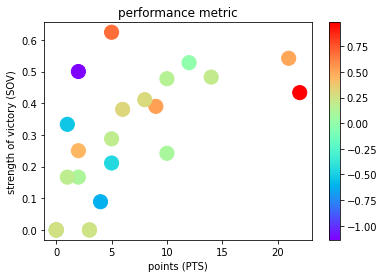

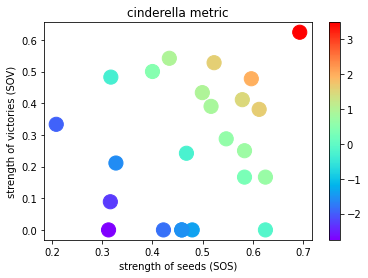

In [36]:
str_table = pd.DataFrame()
str_table['player'] = players.player

# strength of schedule (how difficult were the opposing seeds), sum the seeds of people's wins and losses
# this is independent of your own ranking

# total seeds in singles
list_total_seeds_1s = list()
for name in players.player:
    total_seeds_1s = 0
    for i in range(len(matches_1s)):
        if any([name == matches_1s.loc[i, x] for x in ["p1"]]):
            total_seeds_1s += matches_1s.loc[i, "seed2"] # - matches_1s.loc[i, "seed1"]
        if any([name == matches_1s.loc[i, x] for x in ["p2"]]):
            total_seeds_1s += matches_1s.loc[i, "seed1"] # - matches_1s.loc[i, "seed2"]
    list_total_seeds_1s.append(total_seeds_1s)
str_table['total_seeds_1s'] = list_total_seeds_1s

# total seeds in doubles
list_total_seeds_2s = list()
for name in players.player:
    total_seeds_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
            total_seeds_2s += matches_2s.loc[i, "seed2"] # - matches_2s.loc[i, "seed1"]
        if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
            total_seeds_2s += matches_2s.loc[i, "seed1"] # - matches_2s.loc[i, "seed2"]
    list_total_seeds_2s.append(total_seeds_2s)
str_table['total_seeds_2s'] = list_total_seeds_2s

# average total seeds in singles by ratio to highest seed (norm) and by match (avg)
# this is a metric for how hard someone's journey or matchup was
    # lower numbers faced on average a harder opponent, whether they beat them or not
str_table['avg_norm_total_seeds_1s'] = str_table.total_seeds_1s / max(matches_1s.seed1) / cups_table.GP_1s

# average total seeds in doubles by ratio to highest seed (norm) and by match (avg)
str_table['avg_norm_total_seeds_2s'] = str_table.total_seeds_2s / max(matches_2s.seed1) / cups_table.GP_2s


# SOV metric
# the composite win percentage of all the teams you've beaten

map_player2wpct = dict(wl_table.loc[:, ["player", "W_PCT"]].dropna().to_dict('split')['data'])

# SOV in singles
list_SOV_1s = list()
for name in players.player:
    SOV_1s = 0
    n_1s = 0
    for i in range(len(matches_1s)):
        if name == matches_1s.loc[i, "p1"]:
            if matches_1s.loc[i, "score1"] > matches_1s.loc[i, "score2"]:
                SOV_1s += map_player2wpct[matches_1s.loc[i, "p2"]]
                n_1s += 1
        if name == matches_1s.loc[i, "p2"]:
            if matches_1s.loc[i, "score1"] < matches_1s.loc[i, "score2"]:
                SOV_1s += map_player2wpct[matches_1s.loc[i, "p1"]]
                n_1s +=1
    if n_1s == 0:
        list_SOV_1s.append(np.NaN)
    else:    
        list_SOV_1s.append(SOV_1s / n_1s)
str_table['SOV_1s'] = list_SOV_1s

# SOV in doubles
list_SOV_2s = list()
for name in players.player:
    SOV_2s = 0
    n_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
            if matches_2s.loc[i, "score1"] > matches_2s.loc[i, "score2"]:
                SOV_2s += (map_player2wpct[matches_2s.loc[i, 't2p1']] + map_player2wpct[matches_2s.loc[i, 't2p2']]) / 2
                n_2s += 1
        if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
            if matches_2s.loc[i, "score1"] < matches_2s.loc[i, "score2"]:
                SOV_2s += (map_player2wpct[matches_2s.loc[i, 't1p1']] + map_player2wpct[matches_2s.loc[i, 't1p2']]) / 2
                n_2s += 1
    if n_2s == 0:
        list_SOV_2s.append(np.NaN)
    else:
        list_SOV_2s.append(SOV_2s / n_2s)
str_table['SOV_2s'] = list_SOV_2s

str_table['SOS'] = 1 - str_table[['avg_norm_total_seeds_1s', 'avg_norm_total_seeds_2s']].mean(axis=1)


# overall SOV
list_SOV = list()
for (i, row) in str_table.iterrows():
    if np.isnan(row.SOV_1s) and np.isnan(row.SOV_2s):
        list_SOV.append(0)
    elif np.isnan(row.SOV_1s):
        list_SOV.append(row.SOV_2s)
    elif np.isnan(row.SOV_2s):
        list_SOV.append(row.SOV_1s)
    else:
        list_SOV.append((row.SOV_1s + row.SOV_2s) / 2) 
str_table['SOV'] = [x/100 for x in list_SOV]

str_table['PTS'] = wl_table.PTS

str_table['z_SOS'] = stats.zscore(str_table.SOS)
str_table['z_SOV'] = stats.zscore(str_table.SOV)
str_table['z_PTS'] = stats.zscore(str_table.PTS)

### OLD FORMULAS
# str_table['performance'] = np.power(wl_table.PTS / max(wl_table.PTS), 1/4) / (1 - str_table.SOS)
# str_table['cinderella'] = str_table.SOS * str_table.SOV
# str_table['exceeds_expectations'] = (str_table.z_PTS) - stats.zscore(wl_table.GP)
# str_table['exceeds_expectations'] = (str_table.z_SOV) + stats.zscore(wl_table.GP)
# str_table['underrated'] = np.power(wl_table.PTS / max(wl_table.PTS), 1/4) / ((1 - str_table.SOV) * (1 - str_table.SOS))
###

# SOS: strength of seed, formula based on opponent seed
# SOV: strength of victory, formula based on opponent win percentage
# expectations: a really low assigned seed and (high strength of victory | high number of wins)
# cinderella: like how much do they exceed expectations

performance_w = 0.5
str_table['performance'] = (players.avg_norm_seed * (performance_w)) + (stats.zscore(wl_table.W) * (1 - performance_w))
str_table['cinderella'] = str_table.z_SOS + str_table.z_SOV

display(str_table.sort_values('cinderella', ascending=False).reset_index(drop=True))

plt.scatter(
    x=str_table.PTS,
    y=str_table.SOV,
    s=200,
    c=str_table.performance,
    cmap='rainbow'
    )

plt.title('performance metric')
plt.xlabel('points (PTS)')
plt.ylabel('strength of victory (SOV)')
plt.colorbar()

plt.show()

plt.scatter(
    x=str_table.SOS,
    y=str_table.SOV,
    s=200,
    c=str_table.cinderella,
    cmap='rainbow'
    )

plt.title('cinderella metric')
plt.xlabel('strength of seeds (SOS)')
plt.ylabel('strength of victories (SOV)')
plt.colorbar()

plt.show()

# change RL to RL
# separate Ws worth 2 points and EW (elimination Ws worth 1 point)


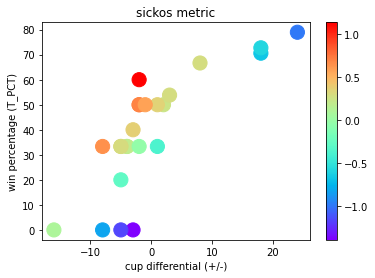

,player,+/-,T,z_+/-,z_W_PCT,sickos,gutsiness
0,Roman Ramirez,24,78.947368,2.730625,1.736854,-0.993771,1.839945
1,Levin Lee,18,72.727273,2.047968,1.463531,-0.584437,1.499045
2,Kevin Cooper,8,66.666667,0.910208,1.197217,0.287008,1.328596
3,Reagan Fryatt,-2,50.000000,-0.227552,0.464852,0.692404,1.044513
4,Jack Massingill,3,53.846154,0.341328,0.633859,0.292531,0.902471
5,Will Simpson,-1,50.000000,-0.113776,0.464852,0.578628,0.817246
6,Rohan Chowla,18,70.588235,2.047968,1.369538,-0.678431,0.719846
7,Cason Duszak,-4,33.333333,-0.455104,-0.267513,0.187591,0.476346
8,Carla Betancourt,-2,60.000000,-0.227552,0.904271,1.131823,0.476346
9,Gabe Silverstein,1,50.000000,0.113776,0.464852,0.351076,0.476346


In [7]:
# sickos metric: nebraska metric: good win differential, bad win percentage
# anti-nebraska metric: bad win differential, good win percentage (I think leah)
sickos_table = pd.DataFrame()
sickos_table['player'] = players.player
sickos_table['+/-'] = fa_table['+/-']
sickos_table['T'] = wl_table['W_PCT']
sickos_table['z_+/-'] = stats.zscore(fa_table['+/-'])
sickos_table['z_W_PCT'] = stats.zscore(wl_table['W_PCT'])

sickos_table['sickos'] =  - sickos_table['z_+/-'] + sickos_table['z_W_PCT']
# sickos_table['nebraska'] = abs(sickos_table['z_+/-']) / abs(sickos_table['z_W_PCT'])
# sickos_table['nebraska'] = ((fa_table['+/-'] / (max(fa_table['+/-']) - min(fa_table['+/-']))) / (wl_table['W_PCT'] / 100)).replace([-np.inf], [np.NaN])

# display(sickos_table.sort_values('anti-nebraska', ascending=False).reset_index(drop=True))

plt.scatter(
    x=fa_table['+/-'],
    y=wl_table['W_PCT'],
    s=200,
    c=sickos_table['sickos'],
    cmap='rainbow'
)

plt.title('sickos metric')
plt.xlabel('cup differential (+/-)')
plt.ylabel('win percentage (T_PCT)')
plt.colorbar()

plt.show()

# sickos metric: gustiness metric: good win percentage facing elimination games
sickos_table['gutsiness'] = stats.zscore(wl_table.EW_PCT)

display(sickos_table.sort_values('gutsiness', ascending=False).reset_index(drop=True))


In [43]:
matches_1s.shape[0]

29

In [51]:
# top 5 crazy matches, top 5 biggest upsets
# given the two players "win"

matches_table = pd.DataFrame()
matches_table = matches_1s.copy()
matches_table.insert(5, "t1p2", [None for _ in range(matches_1s.shape[0])])
matches_table.insert(7, "t2p2", [None for _ in range(matches_1s.shape[0])])
matches_table.rename(columns={'p1': 't1p1', 'p2': 't2p1'}, inplace=True)


matches_table = pd.concat([matches_table, matches_2s]).reset_index(drop=True)

matches_table

,event,match_number,fe1,fe2,p1,t1p2,p2,t2p2,score1,score2,seed1,seed2,tpc,t1p1,t2p1
0,2022_1s,1,False,False,Paul Bartenfeld,None,Jason Jackson,None,4,6,8,9,6,NaN,NaN
1,2022_1s,2,False,False,Kalah Roche,None,Gabe Silverstein,None,5,6,4,13,6,NaN,NaN
2,2022_1s,3,False,False,Aaron Carter,None,Leah Baetcke,None,2,6,5,12,6,NaN,NaN
3,2022_1s,4,False,False,Kevin Cooper,None,Carla Betancourt,None,5,6,2,15,6,NaN,NaN
4,2022_1s,5,False,False,Coby Lovelace,None,Jack Massingill,None,5,6,7,10,6,NaN,NaN
5,2022_1s,6,False,False,Rohan Chowla,None,Reagan Fryatt,None,6,5,3,14,6,NaN,NaN
6,2022_1s,7,False,False,Roman Ramirez,None,Evan Sooklal,None,6,4,6,11,6,NaN,NaN
7,2022_1s,8,True,True,Kalah Roche,None,Aaron Carter,None,3,6,4,5,6,NaN,NaN
8,2022_1s,9,True,True,Kevin Cooper,None,Coby Lovelace,None,6,5,2,7,6,NaN,NaN
9,2022_1s,10,True,True,Reagan Fryatt,None,Evan Sooklal,None,6,5,14,11,6,NaN,NaN


In [35]:
### OVERALL STATS!!!


stats_table = pd.DataFrame()
stats_table['player'] = players.player

def normalize(x: pd.Series):
    return ((x - min(x)) / (max(x) - min(x)) * 0.5) + 0.5

def to_basestat(x: pd.Series):
    return (x * 140).astype(int)

stats_table['performance'] = normalize(str_table.performance)
stats_table['efficiency'] = normalize(cups_table.PCT_CS)
stats_table['gutsiness'] = normalize(sickos_table.gutsiness)
stats_table['cinderella'] = normalize(str_table.cinderella)
stats_table['sickos'] = normalize(sickos_table.sickos)

stats_table.iloc[:,1:] = stats_table.iloc[:,1:].apply(to_basestat)

stats_table['BST'] = stats_table.iloc[:,1:].sum(axis=1)

# display(stats_table.sort_values('player', ascending=True).reset_index(drop=True))
display(stats_table.sort_values('BST', ascending=False).reset_index(drop=True))

#others

# recommended seeding going into next singles tournament,
    # answer: in the order of total PTS with the tie break as win pct

,player,performance,efficiency,gutsiness,cinderella,sickos,BST
0,Carla Betancourt,130,106,108,140,140,624
1,Roman Ramirez,140,140,140,111,81,612
2,Reagan Fryatt,122,118,121,109,127,597
3,Jack Massingill,124,122,118,110,116,590
4,Levin Lee,107,138,132,118,92,587
5,Kevin Cooper,114,126,128,97,116,581
6,Will Simpson,113,114,116,107,124,574
7,Gabe Silverstein,117,113,108,118,118,574
8,Rohan Chowla,123,131,114,111,89,568
9,Coby Lovelace,112,125,89,122,115,563
